In [1]:
## Load the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
## Load the dataset

df = pd.read_csv('D:\The Machine Learning Company\Repositories\ml_mastery\Data/sonar.csv')
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,51,52,53,54,55,56,57,58,59,60
0,0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [3]:
## Drop unnamed column

df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


### Descriptive Statistics

In [4]:
## Shape of the data

df.shape

(208, 61)

In [5]:
## type and metadata

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [6]:
## Check the statistics of the data

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
1,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
2,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
3,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
4,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010
5,208.0,0.104570,0.059105,0.0102,0.067025,0.09215,0.134125,0.3823
6,208.0,0.121747,0.061788,0.0033,0.080900,0.10695,0.154000,0.3729
7,208.0,0.134799,0.085152,0.0055,0.080425,0.11210,0.169600,0.4590
8,208.0,0.178003,0.118387,0.0075,0.097025,0.15225,0.233425,0.6828
9,208.0,0.208259,0.134416,0.0113,0.111275,0.18240,0.268700,0.7106


In [7]:
## Check the columns

df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60'],
      dtype='object')

In [8]:
## Check the class distribution

df['60'].value_counts()

M    111
R     97
Name: 60, dtype: int64

### Data Visualization

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 12

### Unimodal Data Visualization

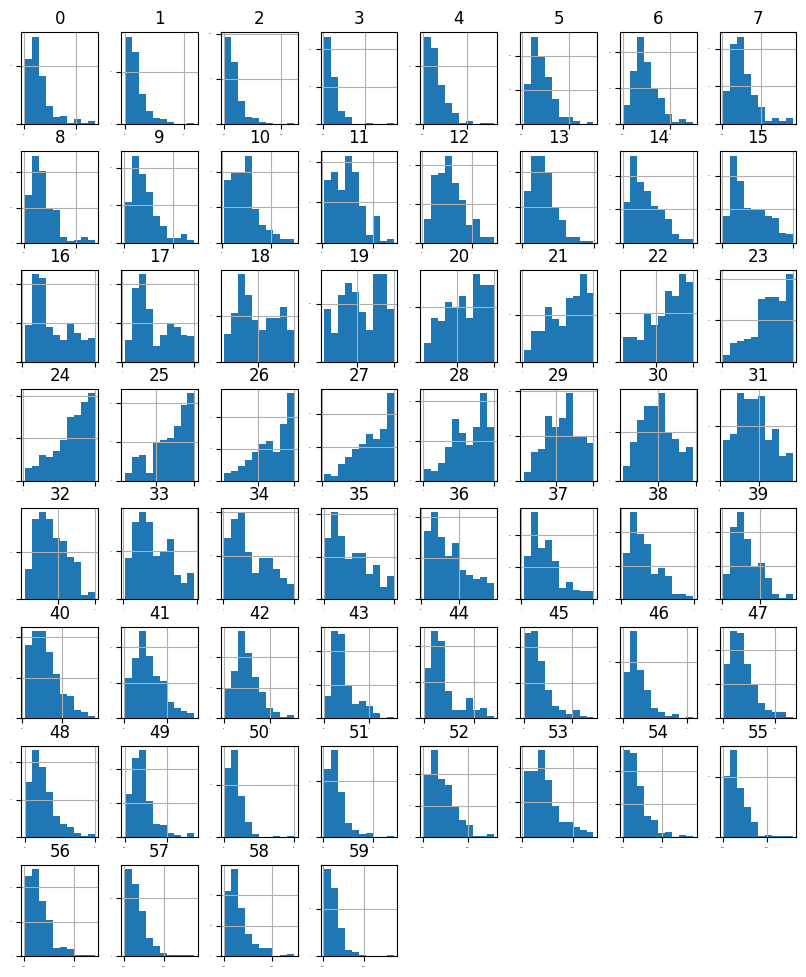

In [10]:
## Histogram

df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show();

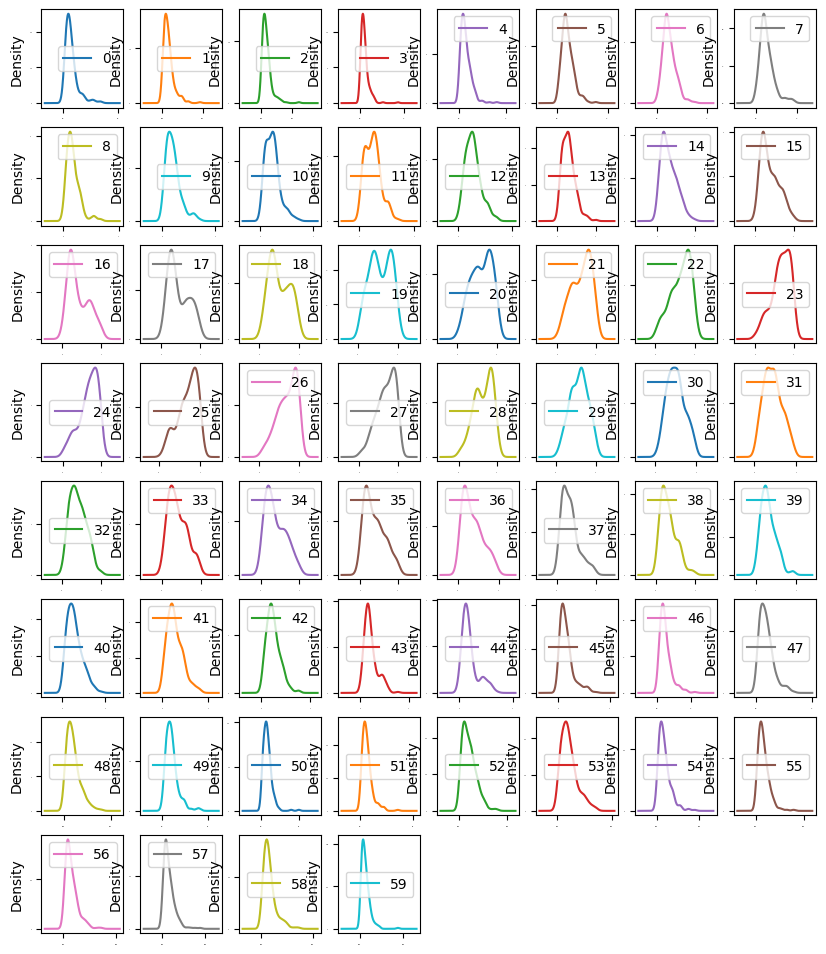

In [11]:
## Density 

df.plot(kind='density', subplots=True, layout=(8,8), sharex=False, sharey=False, fontsize=1)
plt.show();

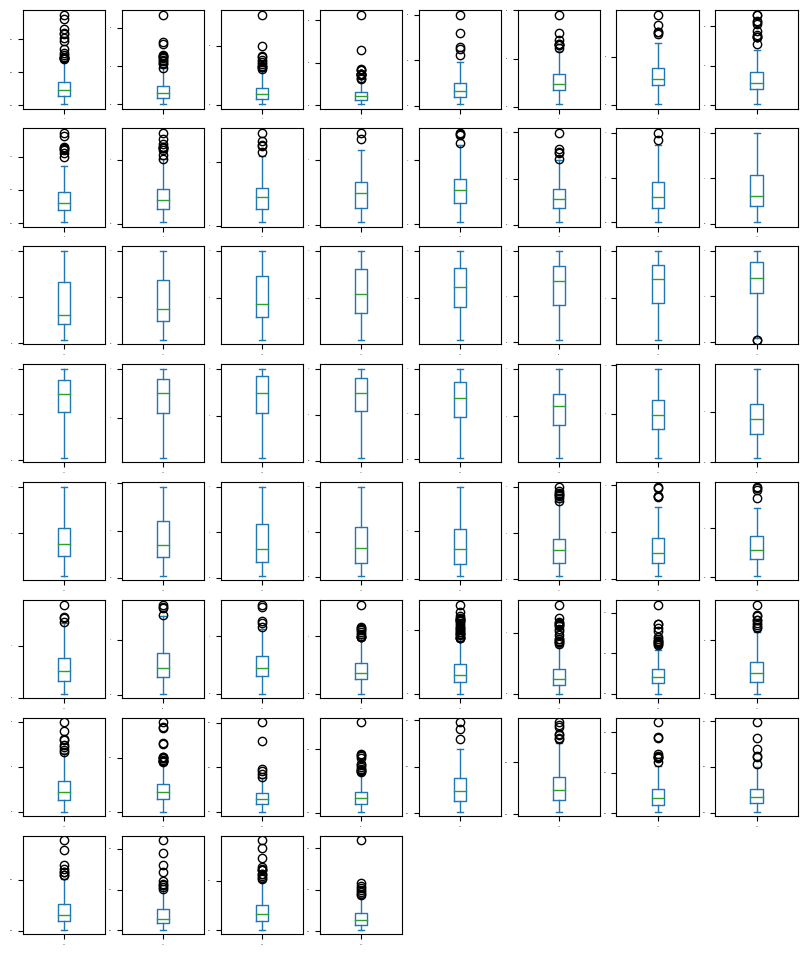

In [12]:
## whisker and Box plot

df.plot(kind='box', subplots=True, layout=(8,8), sharex=False, sharey=False, fontsize=1)
plt.show();

In [13]:
## Lets check the correlation matrix

corr_matrix = df.corr()
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
1,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
2,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
3,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
4,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
5,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,...,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
6,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,...,0.184152,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493
7,0.355523,0.334615,0.237884,0.246742,0.204006,0.471683,0.675774,1.000000,0.778577,0.652525,...,0.260692,0.219038,0.102447,0.234008,0.239551,0.276819,0.267212,0.287603,0.194400,0.146216
8,0.353420,0.316733,0.252691,0.247078,0.177906,0.327578,0.470580,0.778577,1.000000,0.877131,...,0.174873,0.207996,0.105352,0.202615,0.179342,0.232764,0.193963,0.231745,0.097293,0.095243
9,0.318276,0.270782,0.219637,0.237769,0.183219,0.288621,0.425448,0.652525,0.877131,1.000000,...,0.167096,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358


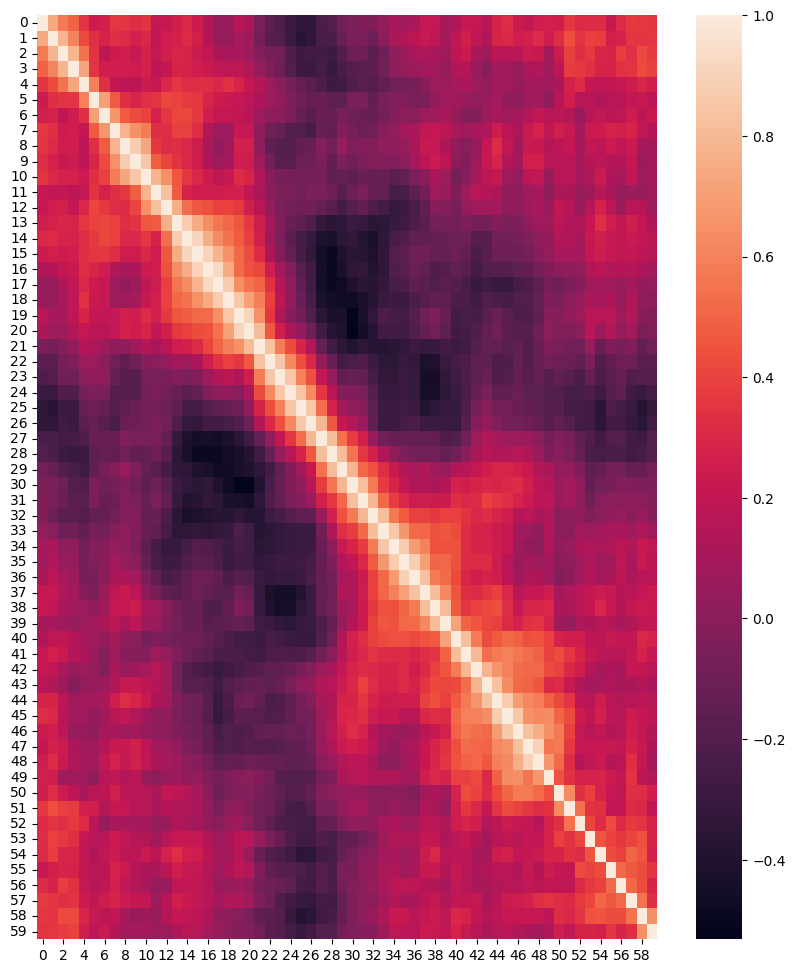

In [14]:
## Visualize this through Heatmap

sns.heatmap(data=corr_matrix);

### Split out Validation dataset

In [15]:
array = df.values

In [16]:
X = array[:, 0:60]
y = array[:, 60]

In [17]:
X

array([[0.02, 0.0371, 0.0428, ..., 0.0084, 0.009, 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018, ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049, ..., 0.0079, 0.0036, 0.0048],
       [0.026, 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]], dtype=object)

In [18]:
y

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M

In [19]:
validation_size = 0.20
seed = 7

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size)

### Evaluate Algorithms

In [20]:
## Spot Check algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(("Decision Tree", DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [21]:
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std())
    print(msg)

('LR', 0.7411764705882353, 0.06624179782091297)
('LDA', 0.7404411764705883, 0.08705087404087493)
('KNN', 0.7827205882352941, 0.0830662711729279)
('Decision Tree', 0.6819852941176471, 0.09602910210741893)
('NB', 0.6871323529411765, 0.08750386175363523)
('SVM', 0.8191176470588235, 0.07170154525319172)


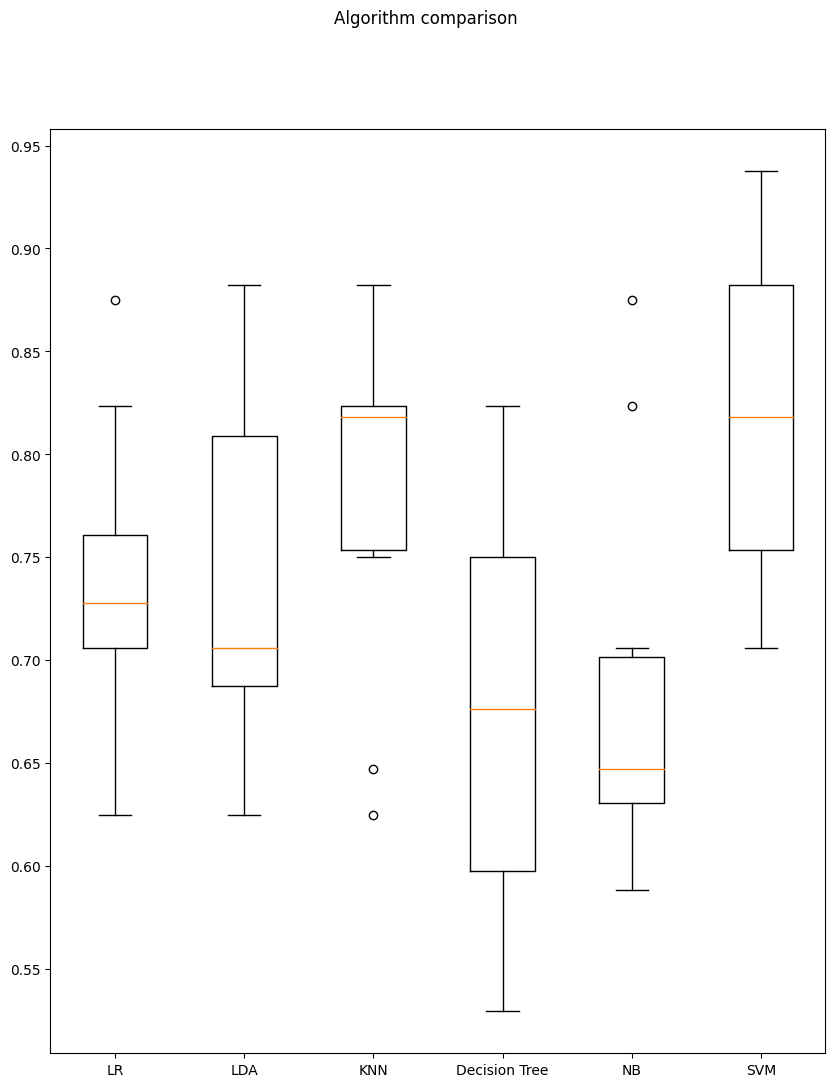

In [22]:
## comparing algorithms

fig = plt.figure()
fig.suptitle('Algorithm comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();

In [23]:
## Standardize the dataset

pipelines = []

pipelines.append(('Scaled LR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('Scaled LDA', Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('Scaled KNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('Scaled Decision Tree', Pipeline([('Scaler', StandardScaler()), ('Decision Tree', DecisionTreeClassifier())])))
pipelines.append(('Scaled Naive Bayes', Pipeline([('Scaler', StandardScaler()), ('Naive Bayes', GaussianNB())])))
pipelines.append(('Scaled SVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])))

In [24]:
results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std())
    print(msg)

('Scaled LR', 0.7830882352941176, 0.09297909688068282)
('Scaled LDA', 0.7404411764705883, 0.08705087404087493)
('Scaled KNN', 0.7878676470588235, 0.11530351946209628)
('Scaled Decision Tree', 0.7, 0.11862188043961847)
('Scaled Naive Bayes', 0.6871323529411765, 0.08750386175363523)
('Scaled SVM', 0.8191176470588235, 0.07293509818127897)


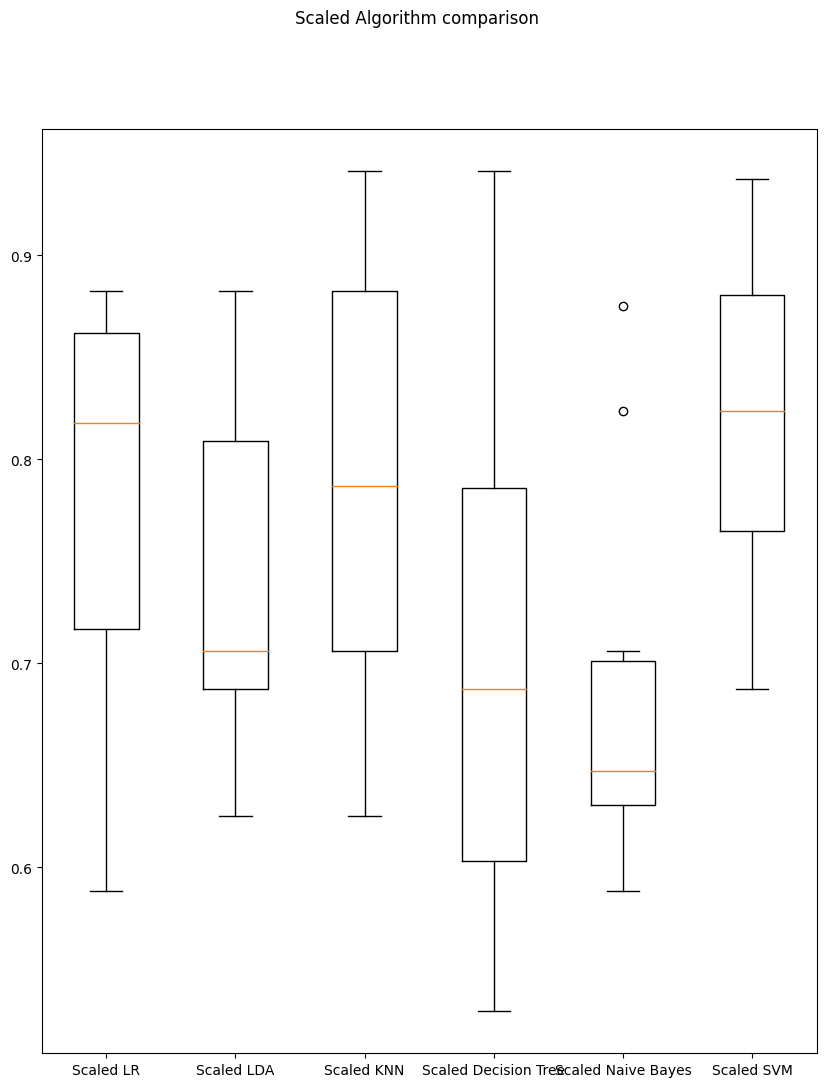

In [25]:
fig = plt.figure()
fig.suptitle('Scaled Algorithm comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();

### Algorithm Tuning

In [28]:
## Tune Scaled KNN

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = np.array([1,3,5,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors = neighbors)

model = KNeighborsClassifier()

kfold = KFold(n_splits=10)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=kfold)

grid_result = grid.fit(rescaledX, y_train)

print("Best Score : ", grid_result.best_score_, grid_result.best_params_)

mean = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, params in zip(mean, stds, params):
    print((mean, stdev, params))

Best Score :  0.8360294117647058 {'n_neighbors': 3}
(0.8235294117647058, 0.09394803190573998, {'n_neighbors': 1})
(0.8360294117647058, 0.09978350266874925, {'n_neighbors': 3})
(0.7944852941176471, 0.11328601327833135, {'n_neighbors': 5})
(0.7591911764705882, 0.09309895045662203, {'n_neighbors': 9})
(0.7345588235294118, 0.11005857201216268, {'n_neighbors': 11})
(0.7227941176470588, 0.10655677775633583, {'n_neighbors': 13})
(0.7408088235294118, 0.08004665189274784, {'n_neighbors': 15})
(0.7165441176470588, 0.07794551181061474, {'n_neighbors': 17})
(0.7224264705882353, 0.0833878318046439, {'n_neighbors': 19})
(0.7224264705882353, 0.0734236371550714, {'n_neighbors': 21})


In [29]:
## Tune scaled SVM

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 2.0]

kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']

param_grid = dict(C=c_values, kernel=kernel_values)

model = SVC()

kfold = KFold(n_splits=10)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=kfold)

grid_result = grid.fit(rescaledX, y_train)

print("Best Score : ", grid_result.best_score_, grid_result.best_params_)

mean = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, params in zip(mean, stds, params):
    print((mean, stdev, params))

Best Score :  0.8555147058823529 {'C': 2.0, 'kernel': 'rbf'}
(0.7477941176470588, 0.10128926681013273, {'C': 0.1, 'kernel': 'linear'})
(0.5886029411764706, 0.1581946461294245, {'C': 0.1, 'kernel': 'poly'})
(0.5463235294117647, 0.11021075280843552, {'C': 0.1, 'kernel': 'rbf'})
(0.6860294117647059, 0.07975823112711283, {'C': 0.1, 'kernel': 'sigmoid'})
(0.7647058823529411, 0.09489283246894487, {'C': 0.3, 'kernel': 'linear'})
(0.6602941176470589, 0.15238693409102008, {'C': 0.3, 'kernel': 'poly'})
(0.7452205882352941, 0.11544410355974356, {'C': 0.3, 'kernel': 'rbf'})
(0.7356617647058824, 0.07932065170683629, {'C': 0.3, 'kernel': 'sigmoid'})
(0.7709558823529411, 0.08723467558584413, {'C': 0.5, 'kernel': 'linear'})
(0.7448529411764706, 0.12700809172380237, {'C': 0.5, 'kernel': 'poly'})
(0.7643382352941176, 0.09241699375815096, {'C': 0.5, 'kernel': 'rbf'})
(0.7352941176470588, 0.08005931516467446, {'C': 0.5, 'kernel': 'sigmoid'})
(0.7702205882352942, 0.08540576491040165, {'C': 0.7, 'kernel': '

### Ensemble Methods 

In [30]:
## Ensembles 

ensembles = []

ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))

In [31]:
results = []
names = []

for name, model in ensembles:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    msg = (name, cv_results.mean(), cv_results.std())
    print(msg)

('AB', 0.8191176470588235, 0.08495431807253559)
('GBM', 0.8610294117647058, 0.06111793721269517)
('RF', 0.8602941176470587, 0.05731050466220549)
('ET', 0.8661764705882353, 0.06743492954829412)


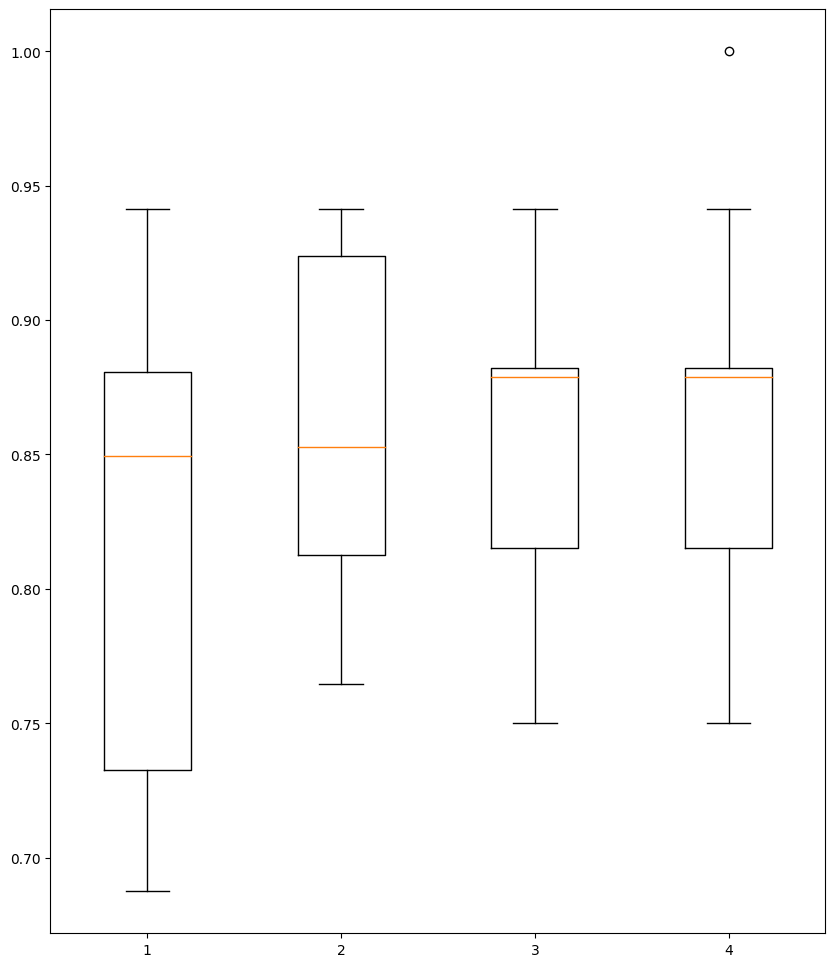

In [32]:
plt.figure()
fig.suptitle('Ensemble Algorithm comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();

### Finalize the model 

We will choose the SVM as it shows the most promising results

In [38]:
## Prepare the model

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

model = SVC(C=2.0, kernel='rbf')
model.fit(rescaledX, y_train)

SVC(C=2.0)

In [39]:
## Estimate accuracy on validation set

rescaledtestX = scaler.transform(X_test)
predictions = model.predict(rescaledtestX)

print(accuracy_score(y_test, predictions))

0.8095238095238095


In [40]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[17  4]
 [ 4 17]]
              precision    recall  f1-score   support

           M       0.81      0.81      0.81        21
           R       0.81      0.81      0.81        21

    accuracy                           0.81        42
   macro avg       0.81      0.81      0.81        42
weighted avg       0.81      0.81      0.81        42

